In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

In [3]:
global_country = pd.read_csv('GlobalLandTemperaturesByCity.csv')

### Exploring the data

In [36]:
global_country.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


### Data Preprocessing

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
data = pd.read_csv("GlobalLandTemperaturesByCity.csv")

# Convert 'dt' to datetime
data['dt'] = pd.to_datetime(data['dt'])

# Handle missing values
data = data.dropna(subset=['AverageTemperature', 'AverageTemperatureUncertainty'])

# Encode categorical features
le_city = LabelEncoder()
le_country = LabelEncoder()
data['City'] = le_city.fit_transform(data['City'])
data['Country'] = le_country.fit_transform(data['Country'])

# Extract numerical values from Latitude and Longitude
data['Latitude'] = data['Latitude'].str.extract('([0-9.]+)').astype(float)
data['Longitude'] = data['Longitude'].str.extract('([0-9.]+)').astype(float)

# Feature scaling
scaler = StandardScaler()
data[['Latitude', 'Longitude']] = scaler.fit_transform(data[['Latitude', 'Longitude']])

# Extract year and month from 'dt'
data['Year'] = data['dt'].dt.year
data['Month'] = data['dt'].dt.month

# Drop 'dt' if not needed
data = data.drop(columns=['dt'])

# Display the processed data
print(data.head())


   AverageTemperature  AverageTemperatureUncertainty  City  Country  Latitude  \
0               6.068                          1.737  3443       39  1.711858   
5               5.788                          3.624  3443       39  1.711858   
6              10.644                          1.283  3443       39  1.711858   
7              14.051                          1.347  3443       39  1.711858   
8              16.082                          1.396  3443       39  1.711858   

   Longitude  Year  Month  
0  -1.339686  1743     11  
5  -1.339686  1744      4  
6  -1.339686  1744      5  
7  -1.339686  1744      6  
8  -1.339686  1744      7  


In [41]:
global_country.shape

(8599212, 7)

In [42]:
sort_by_temp_desc = global_country.sort_values('AverageTemperature', ascending=False)
sort_by_temp_desc

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
8148236,1761-07-01,39.651,4.316,Warqla,Algeria,31.35N,5.65E
4686139,2013-07-01,39.156,0.370,Masjed E Soleyman,Iran,31.35N,49.01E
117009,2013-07-01,39.156,0.370,Ahvaz,Iran,31.35N,49.01E
116997,2012-07-01,39.153,0.504,Ahvaz,Iran,31.35N,49.01E
4686127,2012-07-01,39.153,0.504,Masjed E Soleyman,Iran,31.35N,49.01E
...,...,...,...,...,...,...,...
8596076,1752-06-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E
8596077,1752-07-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E
8596078,1752-08-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E
8596079,1752-09-01,NaN,NaN,Zwolle,Netherlands,52.24N,5.26E


### Visualising the upward trend

In [43]:
global_temp = pd.read_csv('GlobalLandTemperaturesByCity.csv')

<Axes: title={'center': 'Average Global Temperature Movement'}, xlabel='Date (1750 - 2015)', ylabel='Average Global Temperature'>

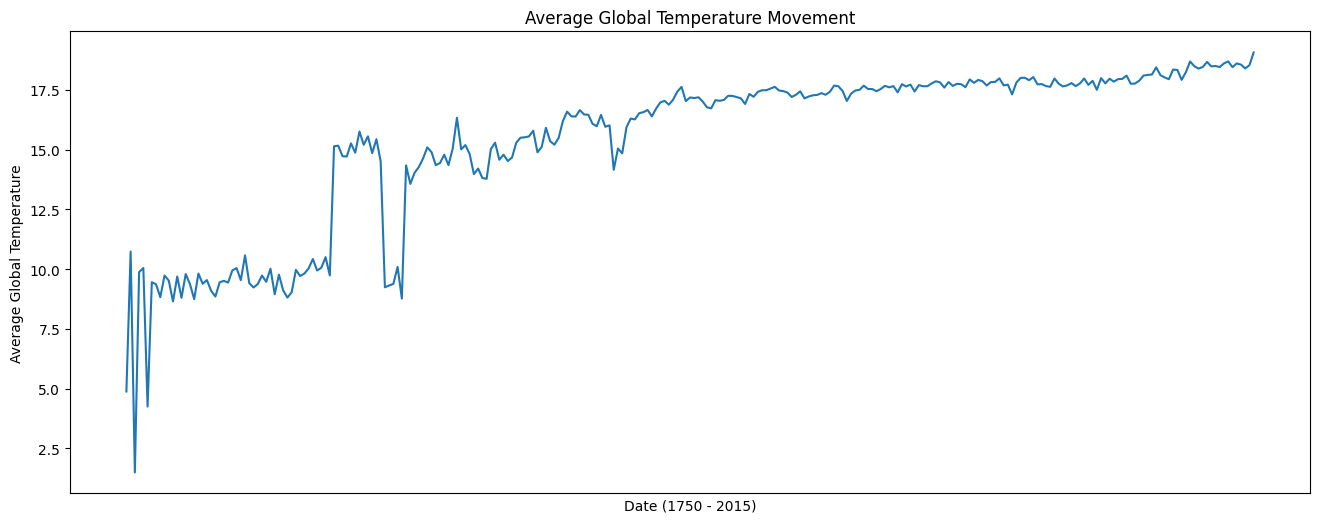

In [44]:
global_temp = global_temp[['dt', 'AverageTemperature']]
global_temp.dropna(inplace=True)
global_temp['dt'] = pd.to_datetime(global_temp.dt).dt.strftime('%d/%m/%Y')
global_temp['dt'] = global_temp['dt'].apply(lambda x:x[6:])
global_temp = global_temp.groupby(['dt'])['AverageTemperature'].mean().reset_index()

plt.figure(figsize =(16, 6))
ax = sns.lineplot(
    x = global_temp['dt'],
    y = global_temp['AverageTemperature'])
ax.set_title('Average Global Temperature Movement')
ax.set_ylabel('Average Global Temperature')
ax.set_xlabel('Date (1750 - 2015)')
ax.axes.get_xaxis().set_ticks([])
ax

### The above visualisation shows a clear upward trend in the average global temperature over the past years

Please be mindful that the data in the early years (1750) is likely to be a little less accurate due to the limits of the record keeping at the time

### Now I'll use machine learning to predict the future average global temperature

In [45]:
global_temp

,dt,AverageTemperature
0,1743,4.882424
1,1744,10.734047
2,1745,1.497593
3,1750,9.872808
4,1751,10.046739
...,...,...
262,2009,18.601106
263,2010,18.553508
264,2011,18.393315
265,2012,18.525969


In [46]:
# Preparing the data for machine learning
X = global_temp.iloc[:, global_temp.columns != 'AverageTemperature'].values
y = global_temp.iloc[:, global_temp.columns == 'AverageTemperature'].values

In [47]:
X[:25]

array([['1743'],
       ['1744'],
       ['1745'],
       ['1750'],
       ['1751'],
       ['1752'],
       ['1753'],
       ['1754'],
       ['1755'],
       ['1756'],
       ['1757'],
       ['1758'],
       ['1759'],
       ['1760'],
       ['1761'],
       ['1762'],
       ['1763'],
       ['1764'],
       ['1765'],
       ['1766'],
       ['1767'],
       ['1768'],
       ['1769'],
       ['1770'],
       ['1771']], dtype=object)

In [48]:
y[:25]

array([[ 4.88242351],
       [10.73404692],
       [ 1.49759278],
       [ 9.87280824],
       [10.04673874],
       [ 4.25306358],
       [ 9.45266578],
       [ 9.36469988],
       [ 8.82522231],
       [ 9.73270836],
       [ 9.51940797],
       [ 8.64849358],
       [ 9.69104546],
       [ 8.79893767],
       [ 9.79443791],
       [ 9.37274406],
       [ 8.74466012],
       [ 9.81416174],
       [ 9.38676592],
       [ 9.54100456],
       [ 9.09367706],
       [ 8.85444051],
       [ 9.44737813],
       [ 9.50991154],
       [ 9.43860139]])

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [50]:
X_train[:25]

array([['1854'],
       ['1928'],
       ['1995'],
       ['1791'],
       ['1844'],
       ['1821'],
       ['1941'],
       ['1938'],
       ['1830'],
       ['1920'],
       ['1935'],
       ['1837'],
       ['1926'],
       ['1850'],
       ['1765'],
       ['1951'],
       ['1923'],
       ['1836'],
       ['1818'],
       ['1896'],
       ['1943'],
       ['2003'],
       ['1869'],
       ['1780'],
       ['1853']], dtype=object)

In [51]:
# Fitting a linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
print (y_pred[:25])

[[17.16984778]
 [13.1850256 ]
 [18.43605296]
 [10.76433923]
 [20.18639541]
 [19.25536219]
 [14.04157616]
 [13.89261085]
 [17.95191568]
 [12.1422684 ]
 [19.77674079]
 [12.663647  ]
 [16.4250212 ]
 [16.20157323]
 [18.24984631]
 [11.02502853]
 [15.9036426 ]
 [16.46226253]
 [16.12709057]
 [12.51468168]
 [17.87743302]
 [18.13812233]
 [18.69674226]
 [10.7270979 ]
 [15.49398798]]


In [53]:
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')
X_test = X_test.astype('float64')
y_test = y_test.astype('float64')

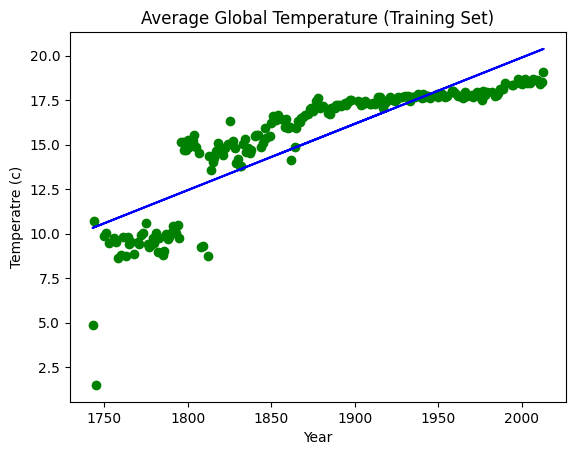

In [54]:
# Visualising the training set results
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Global Temperature (Training Set)')
plt.xlabel('Year')
plt.ylabel('Temperatre (c)')
plt.show()

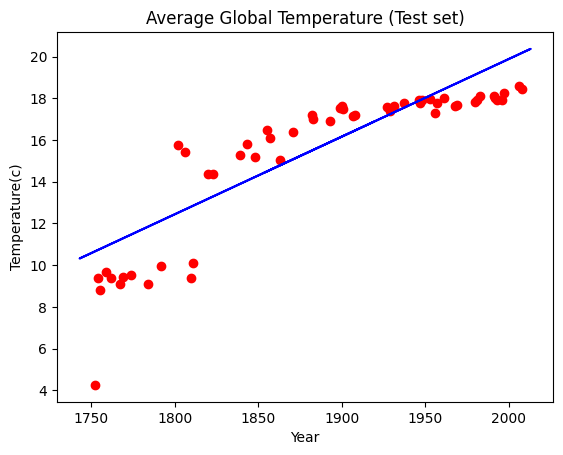

In [55]:
# Visualising the test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Average Global Temperature (Test set)')
plt.xlabel('Year')
plt.ylabel('Temperature(c)')
plt.show()

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 Score): {r2}")


Mean Absolute Error (MAE): 1.4304778357273573
Mean Squared Error (MSE): 3.11943453937574
R-squared (R2 Score): 0.7575072326070105


### Plotting Predicted vs. Actual Values

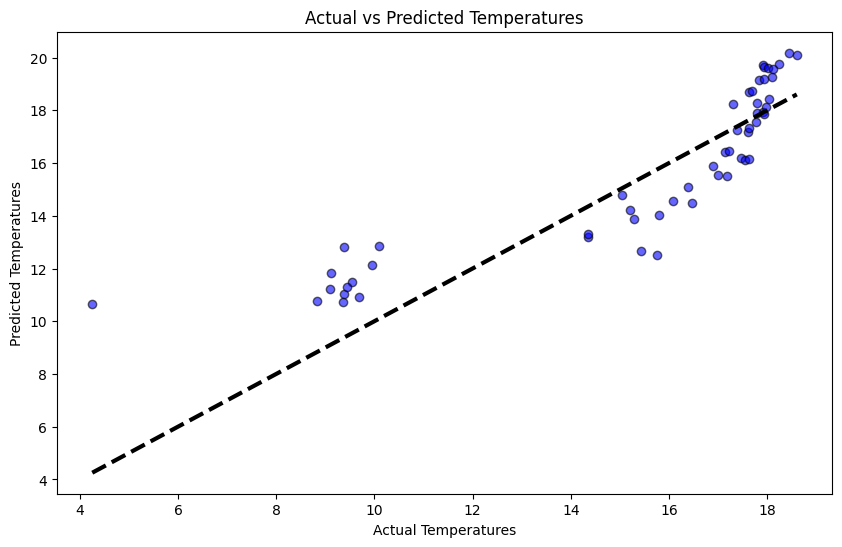

In [57]:
# Plotting Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Temperatures')
plt.ylabel('Predicted Temperatures')
plt.title('Actual vs Predicted Temperatures')
plt.show()


The average global temperature is likely to increase to 21.68 degrees Celsius by 2048.
That is an increase of approximately 16.79 degrees between now and then,
taking into account the combination average of sea and land temperatures.


C:\Users\Anshu\AppData\Local\Temp\ipykernel_24896\2821481971.py:8: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



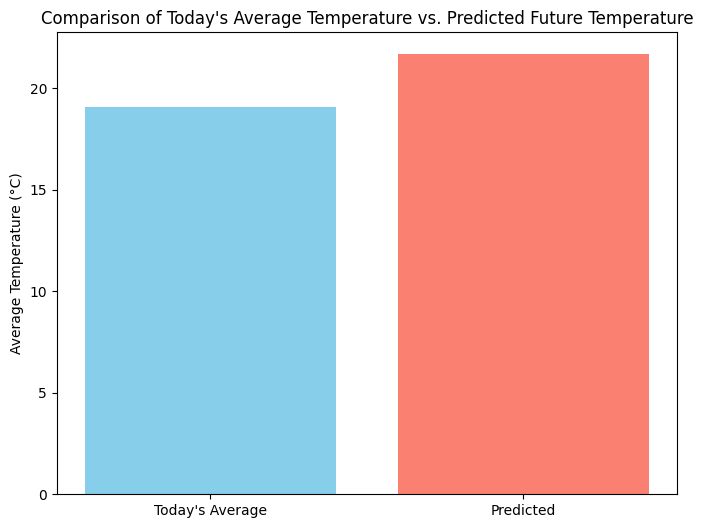

In [58]:
# Define a baseline year (e.g., the earliest year in your dataset)
baseline_year = global_temp['dt'].iloc[0]  # First entry in the 'dt' column
baseline_temperature = float(global_temp[global_temp['dt'] == baseline_year]['AverageTemperature'].values[0])

# Predict the temperature for the desired year
n = int(input("Enter the year you want to predict: "))
X_predict = np.array([n]).reshape(1, -1)
y_predict = float(regressor.predict(X_predict)[0])  # Convert the predicted temperature to float

# Calculate the increase in temperature compared to the baseline year
temperature_increase = y_predict - baseline_temperature

# Output the results in the desired format
print(f"The average global temperature is likely to increase to {y_predict:.2f} degrees Celsius by {n}.")
print(f"That is an increase of approximately {temperature_increase:.2f} degrees between now and then,")
print("taking into account the combination average of sea and land temperatures.")
today_temperature = float(global_temp['AverageTemperature'].iloc[-1])

# Predicted future temperature (already calculated as y_predict)

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(['Today\'s Average', 'Predicted'], [today_temperature, y_predict], color=['skyblue', 'salmon'])
plt.ylabel('Average Temperature (°C)')
plt.title('Comparison of Today\'s Average Temperature vs. Predicted Future Temperature')
plt.show()